In [22]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.special import factorial
import scipy.spatial.distance as distance

In [23]:
np.random.seed(0)
data = 10 * np.random.rand(100,2)

In [24]:
x = np.linspace(0,10,11)
y = np.ones(np.shape(x))

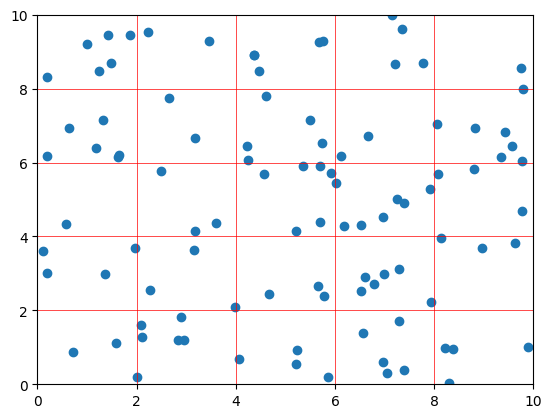

In [25]:
plt.figure()
plt.plot(data[:,0],data[:,1],'o')
for i in range(1,5):
 plt.plot(x,2*i*y,
 color='r',
 linewidth=0.5)
for i in range(1,5):
 plt.plot(2*i*y,x,
 color='r',
 linewidth=0.5)
plt.axis(np.array([0,10,0,10]))
plt.show()

In [26]:
e = np.linspace(0,10,6)
H,xedges,yedges = np.histogram2d(data[:,0],
 data[:,1],bins=(e,e))

In [27]:
x = np.linspace(1,9,5)
y = np.linspace(1,9,5)
z = 0

In [28]:
X,Y = np.meshgrid(x,y)
Z = np.ones((5,5))

In [29]:
X = X.ravel()
Y = Y.ravel()
Z = 0

In [35]:
dx = 2
dy = 2
dz = H
dz = H.ravel()

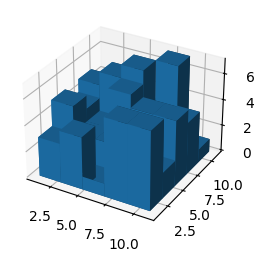

In [36]:
fig = plt.figure()
ax1 = fig.add_subplot(121,projection='3d')
ax1.bar3d(X,Y,Z,dx,dy,dz)
plt.show()

In [37]:
n_obs = H.ravel()

In [38]:
n_exp = 4*np.ones(len(n_obs))

In [39]:
chi2_data = np.sum((n_obs-n_exp)**2/n_exp)
print(chi2_data)

18.5


In [40]:
chi2_theo = stats.chi2.ppf(1-0.05,25-1-1)
print(chi2_theo)

35.17246162690806


In [41]:
np.random.seed(0)
data = 10 * np.random.rand(100,2)

In [42]:
x = np.linspace(0,10,11)
y = np.ones(np.shape(x))

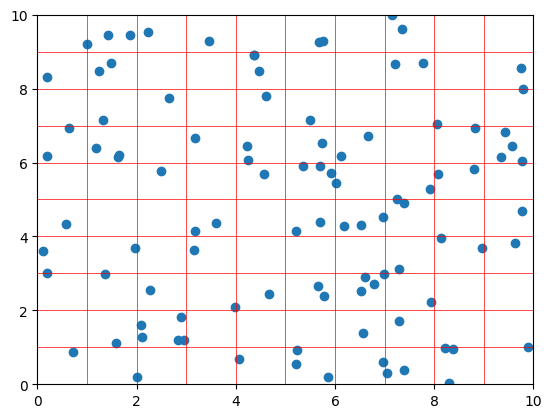

In [43]:
plt.figure()
plt.plot(data[:,0],data[:,1],'o')
for i in range(1,10):
 plt.plot(x,i*y,
 color='r',
 linewidth=0.5)
for i in range(1,10):
 plt.plot(i*y,x,
 color='r',
 linewidth=0.5)
plt.axis(np.array([0,10,0,10]))
plt.show()

In [44]:
e = np.linspace(0,10,8)
H,xedges,yedges = np.histogram2d(data[:,0],data[:,1],
 bins=(e,e))

In [45]:
x = np.linspace(1,9,7)
y = np.linspace(1,9,7)
z = 0

In [46]:
X,Y = np.meshgrid(x,y)
Z = np.ones((7,7))

In [47]:
X = X.ravel()
Y = Y.ravel()
Z = 0

In [48]:
dx = 2
dy = 2
dz = H
dz = H.ravel()

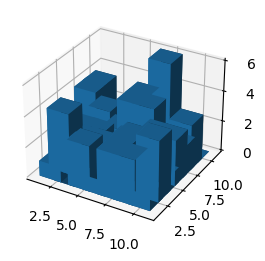

In [49]:
fig = plt.figure()
ax1 = fig.add_subplot(121,projection='3d')
ax1.bar3d(X,Y,Z,dx,dy,dz)
plt.show()

In [50]:
counts = H.ravel()

In [51]:
N = np.linspace(0,5,6)
E = np.linspace(-0.5,5.5,7)

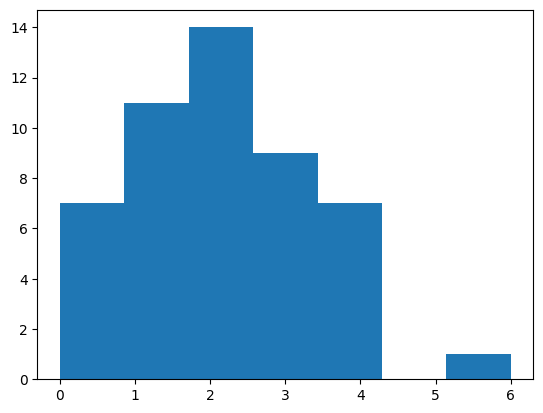

In [53]:
plt.hist(counts,bins=7)
n,e = np.histogram(counts,bins=7)
v = np.diff(e[0:2]) * 0.5 + e[0:-1]
n_obs = n

In [54]:
n_exp = np.ones(7)
for i in range(0,6):
 n_exp[i] = 49*np.exp(-100/49)*(100/49) \
 **N[i]/factorial(N[i])

In [55]:
n_exp = np.sum(n_obs)*n_exp/np.sum(n_exp)

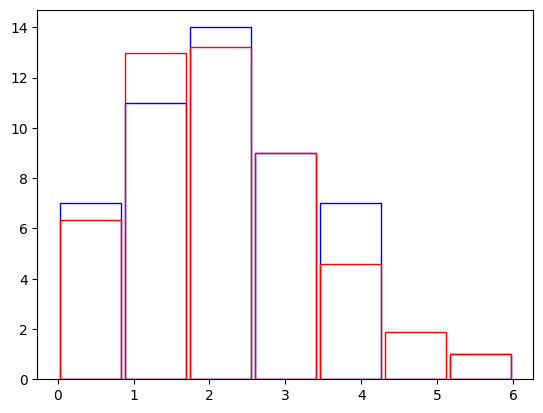

In [56]:
plt.figure()
plt.bar(v,n_obs,
 edgecolor='b',
 color='none')
plt.bar(v,n_exp,
 edgecolor='r',
 color='none')
plt.show()

In [57]:
chi2_data = np.sum((n_obs-n_exp)**2/n_exp)
print(chi2_data)

3.546695554153232


In [58]:
chi2_theo = stats.chi2.ppf(1-0.05,6-1-1)
print(chi2_theo)

9.487729036781154


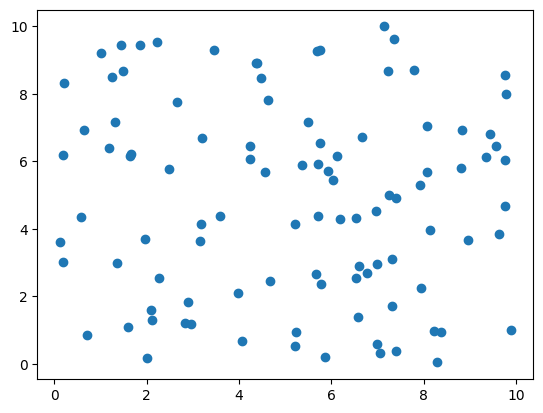

In [59]:
np.random.seed(0)
data = 10 * np.random.rand(100,2)
plt.figure()
plt.plot(data[:,0],data[:,1],'o')
plt.show()

In [60]:
distances = distance.pdist(data)
distarray = distance.squareform(distances)

In [61]:
nearest = np.zeros(100)
for i in range(0,100):
 distarray[i,i] = np.Inf
 k = np.where(distarray[i,:]==np.min(distarray[i,:]))
 nearest[i]=distarray[i,k]

C:\Users\arad7\AppData\Local\Temp\ipykernel_5356\2887266895.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  nearest[i]=distarray[i,k]


In [62]:
observednearest = np.mean(nearest)
print(observednearest)

0.5284579351787346


In [63]:
maparea = (np.max(data[:,0])-np.min(data[:,0])) * \
 (np.max(data[:,1])-np.min(data[:,1]))
expectednearest = 0.5 * np.sqrt(maparea/len(data))
print(expectednearest)

0.49268341482387124
